In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import animation

#%matplotlib inline

# Main function:

In [2]:
def evolve2(field, b, num_steps):
    L = int(np.sqrt(np.size(field)))
    current = np.zeros((L, L), dtype=int)
    scores = np.zeros((L, L), dtype=float)
    
    for step in range(num_steps):
        current = field.copy()
        scores = np.zeros((L, L), dtype=float)
        
        for x in range(L):
            for y in range(L):
                for i in range(-1, 2):
                    for j in range(-1, 2): 
                        if (i==-1 and j==-1) or (i==1 and j==1):
                            continue
                        
                        scores[x, y] += (1 - field[(x + i) % L, (y + j) % L])
                        
                if field[x, y] == 1:
                    scores[x, y] *= b
        
        for x in range(L):
            for y in range(L):
                bestX = x
                bestY = y                
                for i in range(-1, 2):
                    for j in range(-1, 2):  
                        if (i==-1 and j==-1) or (i==1 and j==1):
                            continue                       
                        
                        if (scores[bestX, bestY] < scores[(x + i) % L, (y + j) % L]):
                            bestX = (x + i) % L
                            bestY = (y + j) % L
                
                field[x, y] = current[bestX, bestY]
    return field

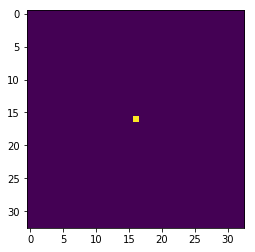

In [19]:
L = 33
field = np.zeros((L, L), dtype=int)
field[int(L/2), int(L/2)] = 1
plt.imshow(field)

C:\Users\alez_\Anaconda3\lib\site-packages\matplotlib\animation.py:1218: UserWarning: MovieWriter ffmpeg unavailable
  warnings.warn("MovieWriter %s unavailable" % writer)


ValueError: outfile must be *.htm or *.html

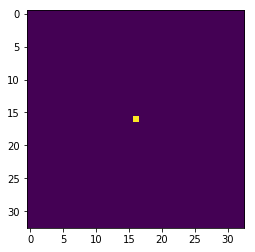

In [17]:
L = 33
field = np.zeros((L, L), dtype=int)
field[int(L/2), int(L/2)] = 1

# draw the initial field
fig = plt.figure()
im = plt.imshow(field, animated=True)

# updater function
def updatefig(*args):
    global field
    field = evolve2(field, 2.34, 1)
    im.set_array(field)
    return im,

# animate!
anim = animation.FuncAnimation(fig, updatefig, frames=200, interval=50)

anim.save('field.mp4', fps=1)

plt.show()